# **Knowledge Graph Analytics Example**

Hands-On Data Analytics example for lecture 5.6 Knowledge Graph Analytics of OpenHPI Knowledge Graphs 2020 Course

*Please make a copy of this notebook to try out your own adaptions via "File -> Save Copy in Drive"*

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import scipy as scp
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


First, we are going to read in the data. In the example, we are reading from a GoogleDoc spreadsheet. Therefore, we first have to **authenticate with Google Docs**...

In [2]:
#Prepare to read Data from Google Sheets
!pip install --upgrade -q gspread

In [ ]:
#Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

We are **reading the data** into a comfortable data stracture (pandas).([Read the python documentation to learn more about the datastructure](http://pandas.pydata.org/pandas-docs/version/0.15/10min.html)). The usage here is more or less straight forward.

In [3]:
#Read Google Spreadsheet as CSV into pandas DataFrame
import pandas as pd
physicists = pd.read_csv('https://docs.google.com/spreadsheets/d/' + '1srbAnRTUkmG1fTN_RmlLZycGnW9ZVfCnsTkc69s4nFQ' +
                   '/export?gid=270987752&format=csv'
                  )
physicists.head(10) 

,physicist,bdate,countries,occupations,employers,awards,members,fields,gender
0,http://www.wikidata.org/entity/Q937,1879,5,14,15,17,18,1,male
1,http://www.wikidata.org/entity/Q80,1955,1,7,6,40,5,2,male
2,http://www.wikidata.org/entity/Q6722,1777,3,8,1,6,12,10,male
3,http://www.wikidata.org/entity/Q4517,1911,3,8,1,10,3,2,male
4,http://www.wikidata.org/entity/Q1585,1789,2,3,2,3,4,1,male
5,http://www.wikidata.org/entity/Q680,1745,4,4,1,3,6,1,male
6,http://www.wikidata.org/entity/Q675,1775,1,4,2,2,10,1,male
7,http://www.wikidata.org/entity/Q464,1821,2,4,1,1,3,2,male
8,http://www.wikidata.org/entity/Q7085,1885,1,7,1,18,19,2,male
9,http://www.wikidata.org/entity/Q40262,1941,1,3,5,13,7,2,male


First, let's **get some insights about our data**. 

In [4]:
physicists.describe()

,bdate,countries,occupations,employers,awards,members,fields
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1906.517123,1.460274,3.266438,2.008219,5.780822,3.400000,1.329452
std,51.602733,0.693006,1.864380,1.402021,4.934378,3.072842,0.907864
min,1632.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1896.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1920.000000,1.000000,3.000000,2.000000,4.000000,2.000000,1.000000
75%,1938.000000,2.000000,4.000000,3.000000,8.000000,4.000000,1.000000
max,2000.000000,5.000000,15.000000,15.000000,40.000000,19.000000,13.000000


Let's have a look on the distribution of the numerical data via **histogram plots**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bc3dab2e8>,
      dtype=object)

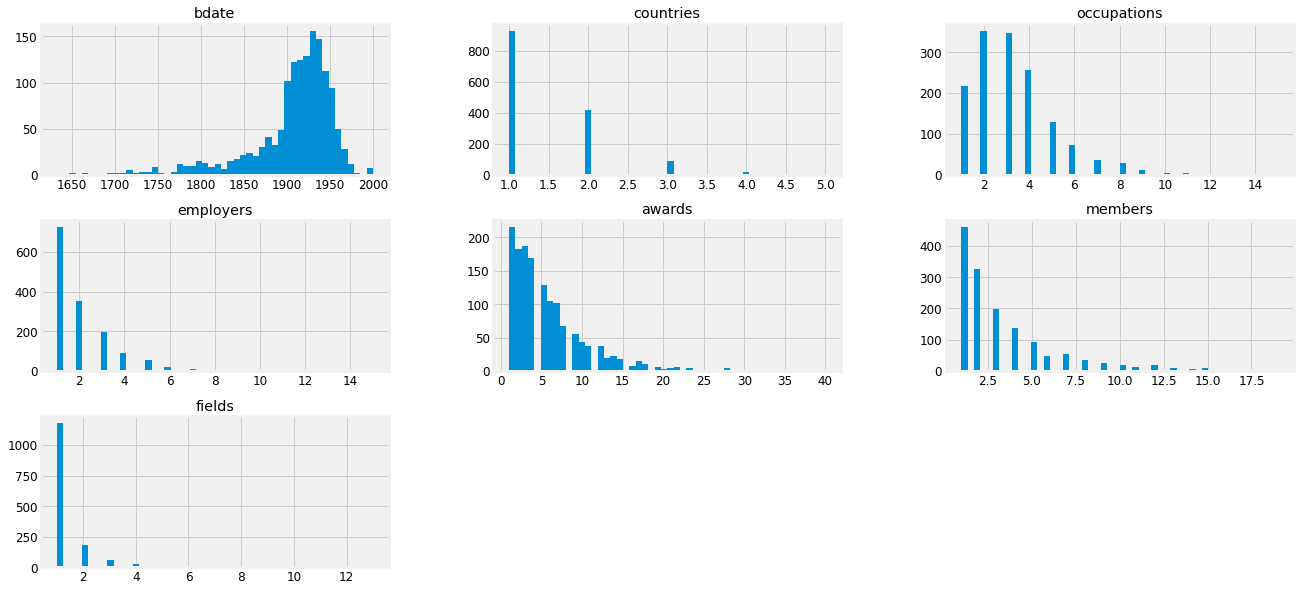

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
physicists.hist(bins=50, figsize=(20,10))

In [9]:
plt.style.use('fivethirtyeight')

**Boxplots** are visualizing the numbers that we have already inspected 

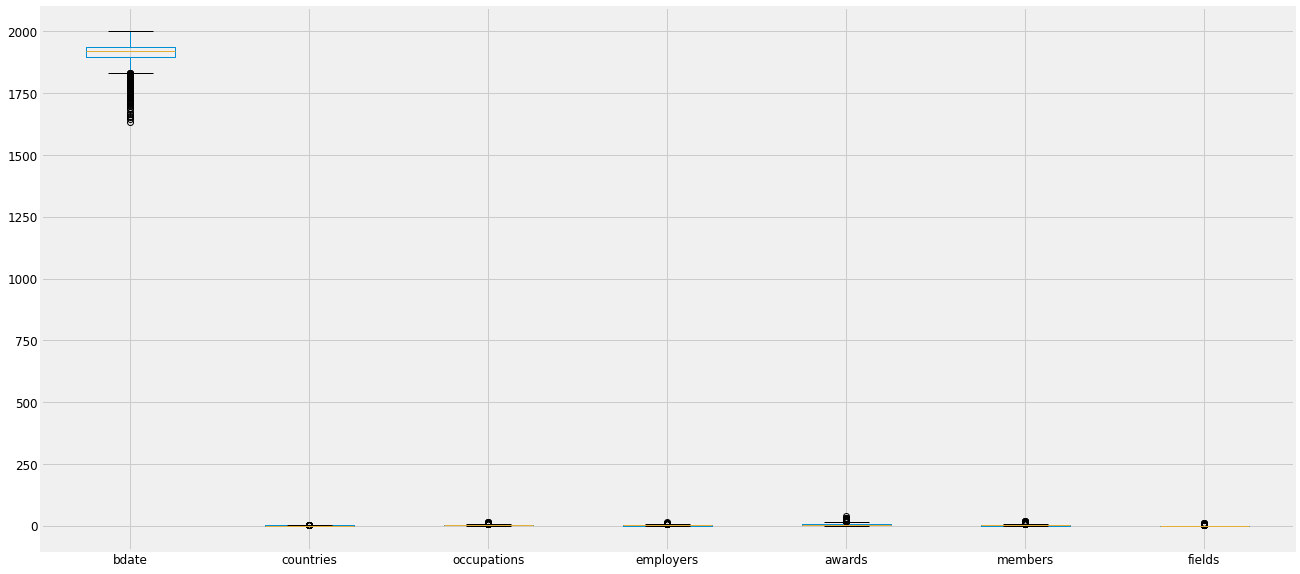

In [11]:
physicists.boxplot(figsize=(20,10))

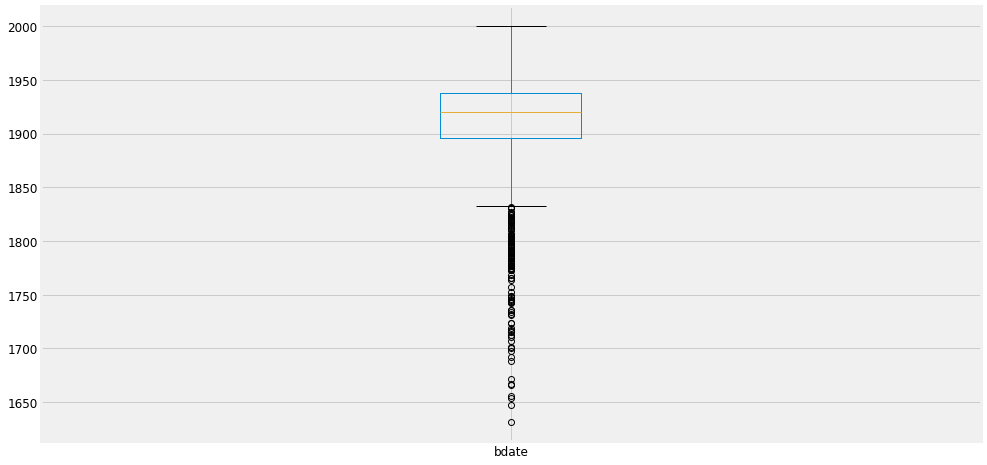

In [12]:
physicists.boxplot('bdate', figsize=(15,8))

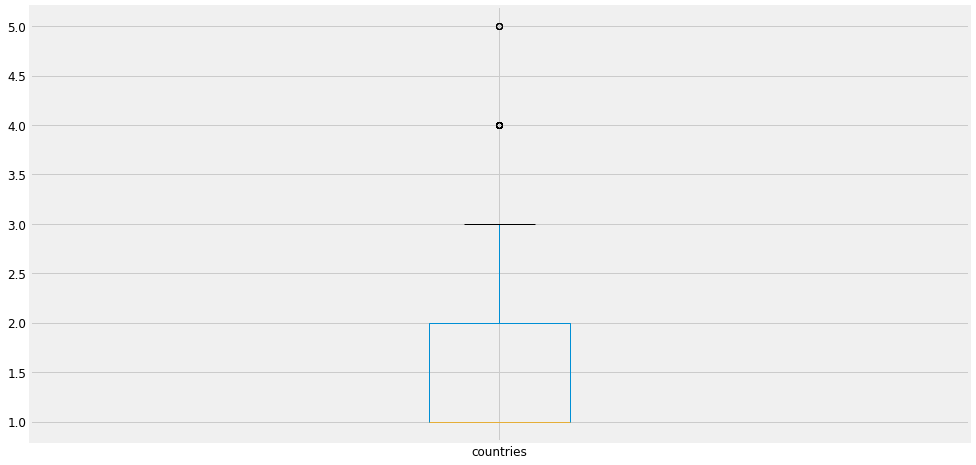

In [13]:
physicists.boxplot(column='countries', figsize=(15,8))

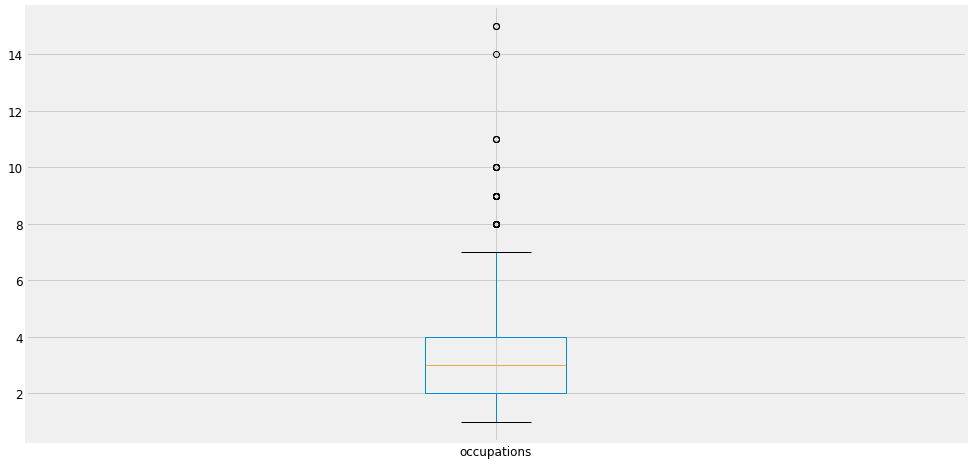

In [14]:
physicists.boxplot('occupations', figsize=(15,8))

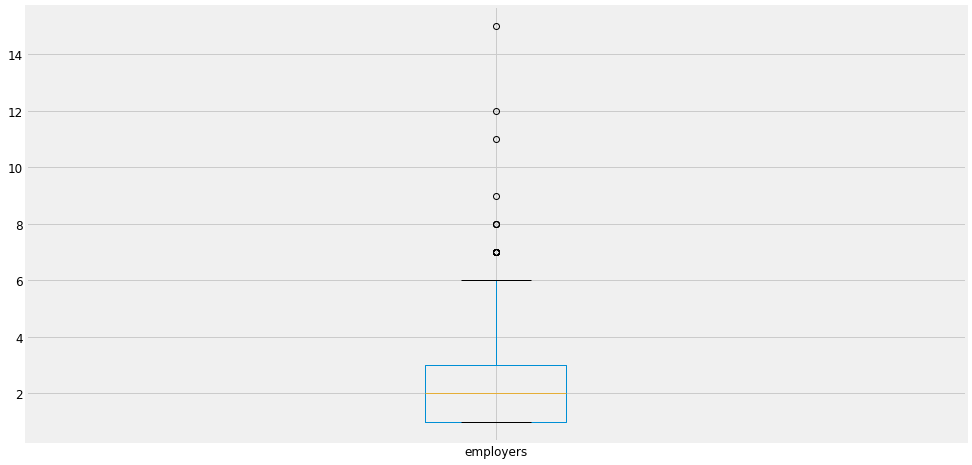

In [15]:
physicists.boxplot('employers', figsize=(15,8))

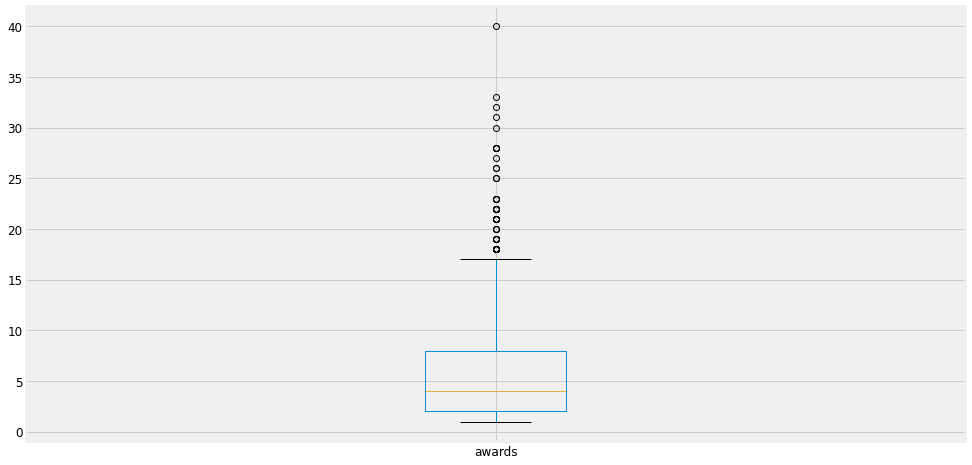

In [16]:
physicists.boxplot('awards', figsize=(15,8))

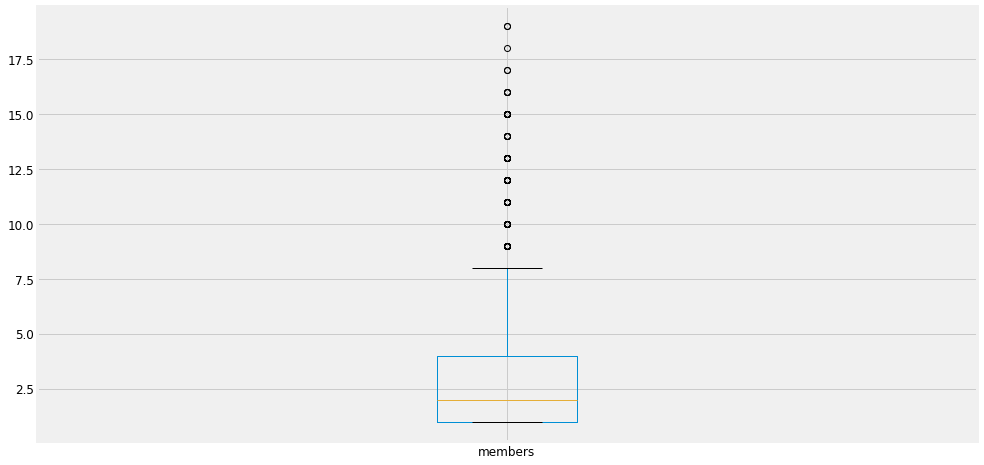

In [17]:
physicists.boxplot('members', figsize=(15,8))

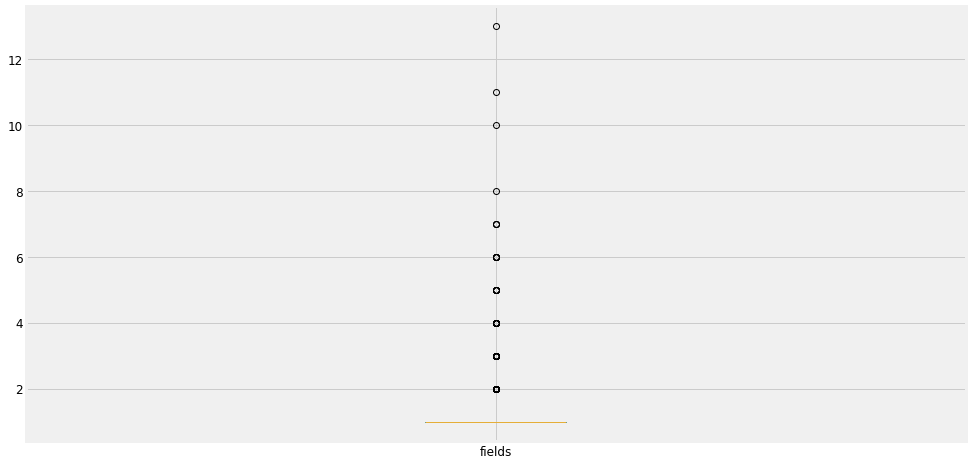

In [18]:
physicists.boxplot('fields', figsize=(15,8))

We can compare the counts for female and male physicists.

In [19]:
physicists["gender"].value_counts()

male      1393
female      67
Name: gender, dtype: int64

...and we can have a look at the birth year distribution (in numbers)

In [20]:
physicists["bdate"].value_counts()

1928    28
1936    26
1931    26
1932    25
1929    23
        ..
1788     1
1787     1
1785     1
1780     1
1632     1
Name: bdate, Length: 227, dtype: int64

With a **Scatter Plot** you can relate on measure to another, as e.g. *year of birth* with number of *working fields*.

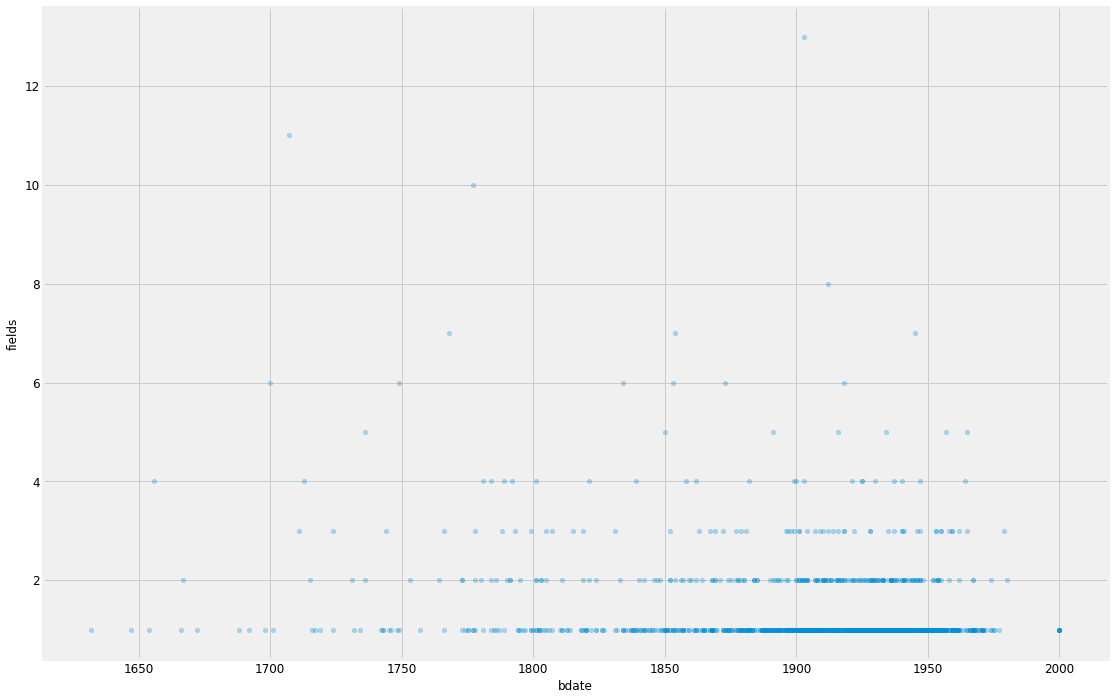

In [21]:
physicists.plot(kind="scatter", x="bdate", y="fields", figsize=(17,12), alpha=0.3)

You might include more measures and use **colors**, **dot sizes**, and **transparency** as additional indicators...

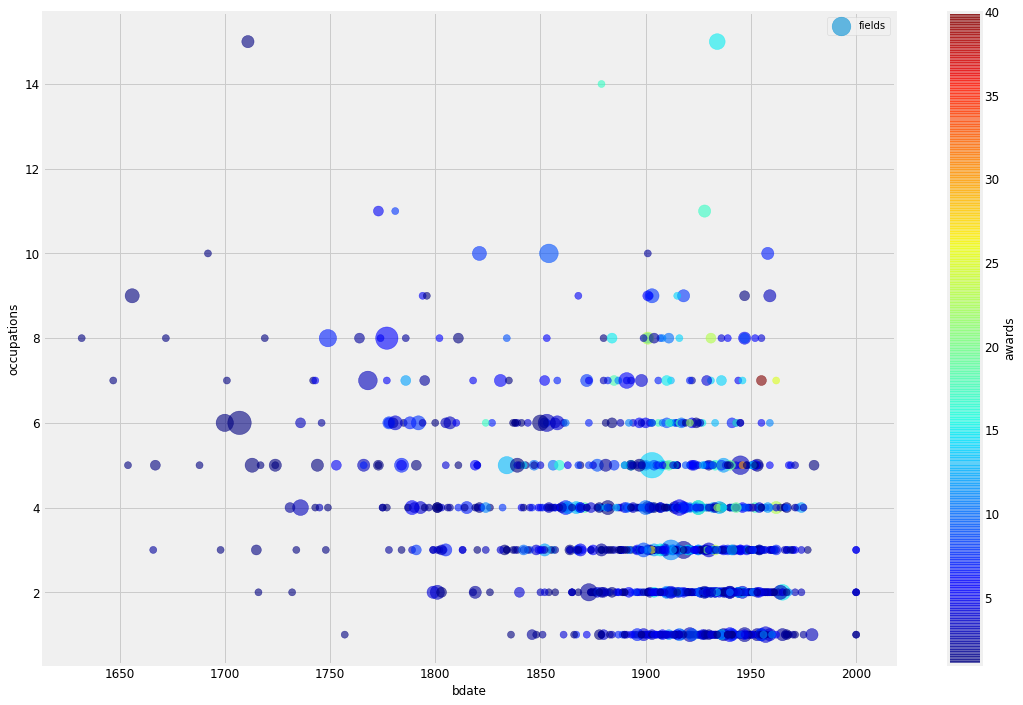

In [22]:
physicists.plot(kind="scatter", x="bdate", y="occupations", figsize=(17,12), alpha=0.6,
          s=physicists["fields"]*50, label="fields",
          c="awards", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)

Now let's have a look, whether there is a corellation among the numerical data

In [23]:
corr_matrix = physicists.corr()
corr_matrix["bdate"].sort_values(ascending=False)

bdate          1.000000
awards         0.178426
countries      0.003555
employers     -0.001565
fields        -0.210920
members       -0.270885
occupations   -0.370931
Name: bdate, dtype: float64

What can you read from the shown correlations?

In [24]:
corr_matrix = physicists.corr()
corr_matrix["fields"].sort_values(ascending=False)

fields         1.000000
occupations    0.225082
members        0.205542
countries      0.160804
employers      0.091567
awards         0.062795
bdate         -0.210920
Name: fields, dtype: float64

What can you read from the shown correlations?

Now let's see, whether there are differences between the data of male and female physicists

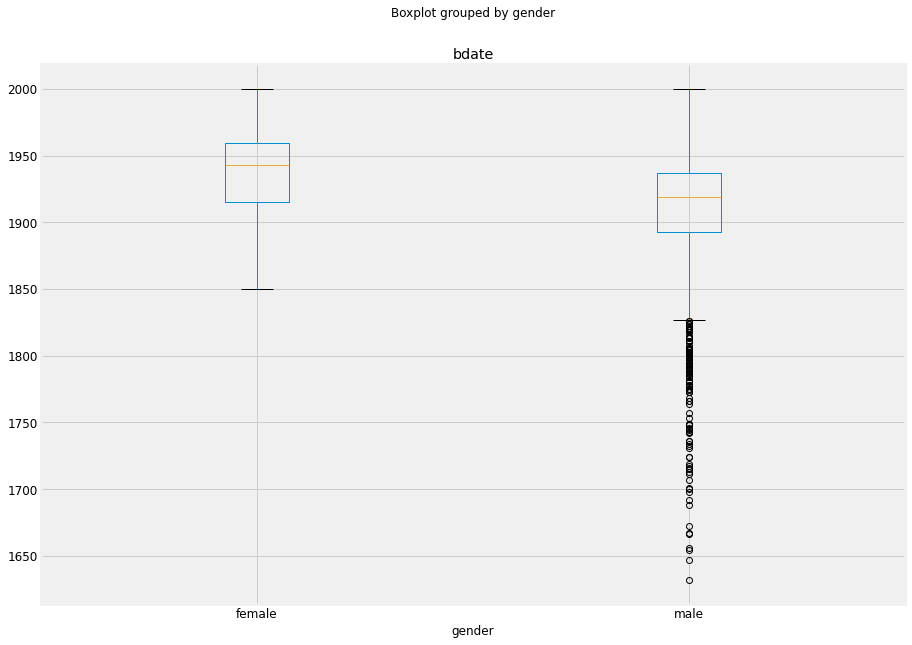

In [25]:
physicists.boxplot(column='bdate', by='gender',figsize=(15,10))

What can you read from the box plot?

For further analysis, let's encode **gender** (given as string) by numbers

In [26]:
physicists_gender_encoded, physicists_gender = physicists["gender"].factorize()
physicists_gender_encoded[:20]    #sample of first 20

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

Take a look at our **gender encoding**

In [27]:
physicists_gender     # encoding

Index(['male', 'female'], dtype='object')

In [28]:
physicists['gender_num']=physicists_gender_encoded
physicists.head(15)

,physicist,bdate,countries,occupations,employers,awards,members,fields,gender,gender_num
0,http://www.wikidata.org/entity/Q937,1879,5,14,15,17,18,1,male,0
1,http://www.wikidata.org/entity/Q80,1955,1,7,6,40,5,2,male,0
2,http://www.wikidata.org/entity/Q6722,1777,3,8,1,6,12,10,male,0
3,http://www.wikidata.org/entity/Q4517,1911,3,8,1,10,3,2,male,0
4,http://www.wikidata.org/entity/Q1585,1789,2,3,2,3,4,1,male,0
5,http://www.wikidata.org/entity/Q680,1745,4,4,1,3,6,1,male,0
6,http://www.wikidata.org/entity/Q675,1775,1,4,2,2,10,1,male,0
7,http://www.wikidata.org/entity/Q464,1821,2,4,1,1,3,2,male,0
8,http://www.wikidata.org/entity/Q7085,1885,1,7,1,18,19,2,male,0
9,http://www.wikidata.org/entity/Q40262,1941,1,3,5,13,7,2,male,0


Now we can also include these measures (transferred into numerals) into a scatter plot

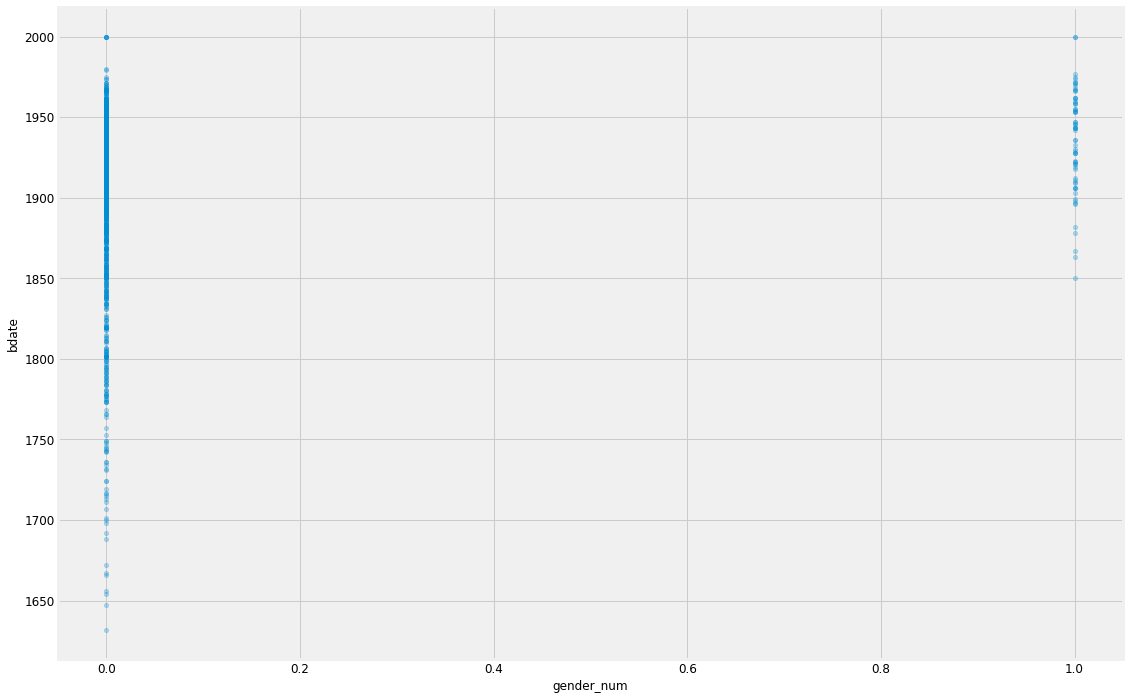

In [29]:
physicists.plot(kind="scatter", x="gender_num", y="bdate", figsize=(17,12), alpha=0.3)

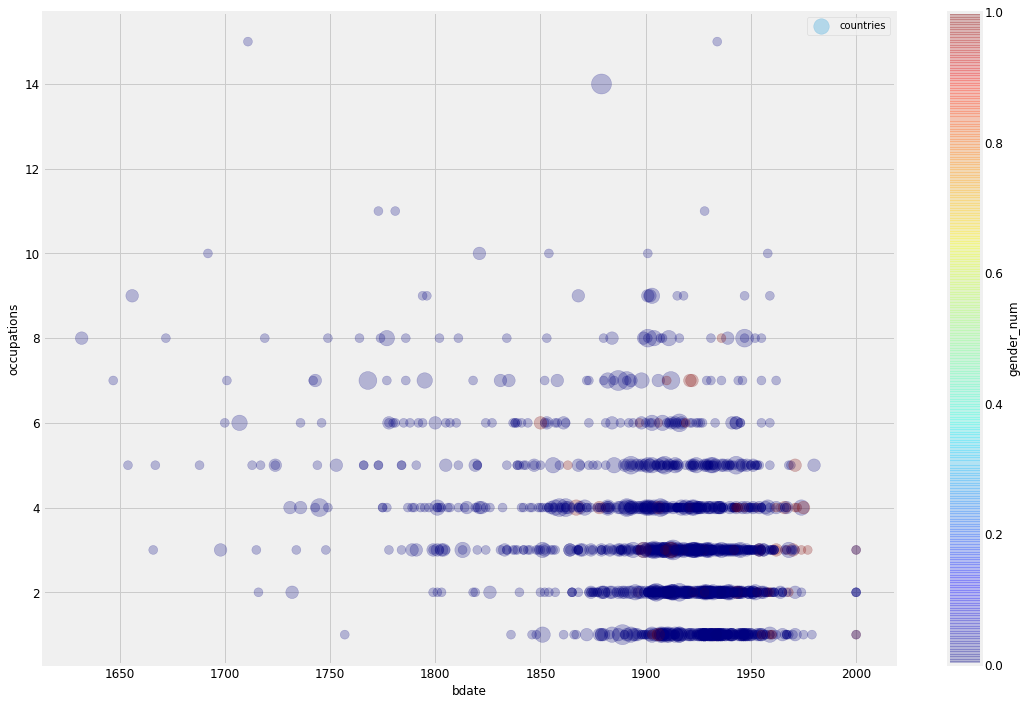

In [30]:
physicists.plot(kind="scatter", x="bdate", y="occupations", figsize=(17,12), alpha=0.25,
          s=physicists["countries"]*80, label="countries",
          c="gender_num", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)